# 1. Building Recommendation Systems using Amazon Reviews
## 1.1 Context
Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.
## 1.2 Attribute Information
● userId : Every user identified with a unique id<br/>
● productId : Every product identified with a unique id<br/>
● Rating : Rating of the corresponding product by the corresponding user<br/>
● timestamp : Time of the rating ( ignore this column for this exercise)<br/>
## 1.3 Objective
Build a recommendation system to recommend products to customers based on the their previous ratings for other products.

# 2. Data Preparation and EDA
## 2.1 Loading the necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

## 2.2 Load the Dataset

In [2]:
data = pd.read_csv('ratings_Electronics.csv', names=['userId', 'productId', 'Rating', 'timestamp'])
data.head(5)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
Rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337e+00,1.380910e+00,1.0,3.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
timestamp,7824482.0,1.338178e+09,6.900426e+07,912729600.0,1.315354e+09,1.361059e+09,1.386115e+09,1.406074e+09


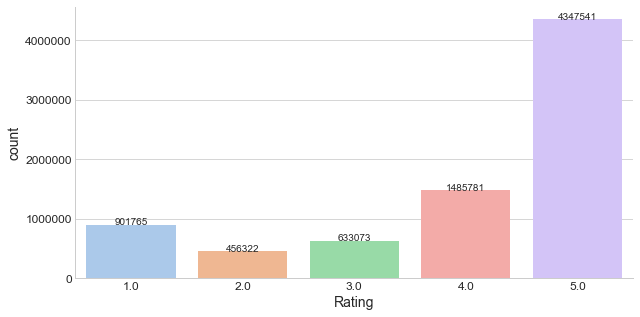

In [5]:
# Check the distribution of ratings 

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.figure(figsize= (10,5))
ax = sns.countplot(x="Rating", data=data, palette="pastel")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+8), ha='center')

plt.show()

In [6]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data : ', data.userId.nunique())
print('Number of unique ITEMS in Raw data : ', data.productId.nunique())

Number of unique USERS in Raw data :  4201696
Number of unique ITEMS in Raw data :  476002


## 2.3 Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

In [7]:
# Top 10 users based on rating
most_rated = data.groupby('userId').size().sort_values(ascending=False)[:10]
most_rated

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

In [8]:
# Data model preparation as per requirement on number of minimum ratings = 50 for a user
counts = data['userId'].value_counts()
df_final = data[data['userId'].isin(counts[counts >= 50].index)]

print('Number of users who have rated 50 or more items =', len(df_final))
print('Number of unique USERS in final data = ', df_final['userId'].nunique())
print('Number of unique ITEMS in final data = ', df_final['productId'].nunique())

Number of users who have rated 50 or more items = 125871
Number of unique USERS in final data =  1540
Number of unique ITEMS in final data =  48190


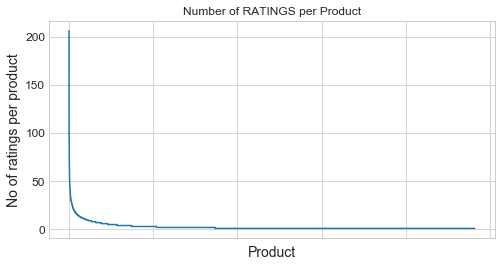

In [9]:
no_of_ratings_per_product = df_final.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('Number of RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [10]:
# bdf_final has users who have rated 50 or more items.
# Calculate the density of the rating matrix

final_ratings_matrix = df_final.pivot(index = 'userId', columns ='productId', values = 'Rating').fillna(0)
print(f'Shape of final ratings matrix: {final_ratings_matrix.shape}\n')

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print(f'Given number of ratings: {given_num_of_ratings}\n')

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print(f'Possible number of ratings: {possible_num_of_ratings}\n')

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('Density: {:4.2f}%'.format(density))

Shape of final ratings matrix: (1540, 48190)

Given number of ratings: 125871

Possible number of ratings: 74212600

Density: 0.17%


In [11]:
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,B000001OM4,B000001OM5,B000001OMI,B000001OMN,B000001OMZ,B000001ON0,B000001ON6,B000006OQ8,B00000DM9M,B00000DM9W,B00000IGBF,B00000J03B,B00000J040,B00000J05A,B00000J061,B00000J08C,B00000J08Q,B00000J0A2,B00000J0E8,B00000J0GF,B00000J1AG,B00000J1E6,B00000J1EP,B00000J1EQ,B00000J1F3,B00000J1G6,B00000J1P1,B00000J1QR,B00000J1QS,B00000J1SC,B00000J1TX,B00000J1U8,B00000J1UA,B00000J1UB,B00000J1UQ,B00000J1US,B00000J1UU,B00000J1V1,B00000J1V3,B00000J1V5,B00000J1V7,B00000J1V8,B00000J3FU,B00000J3G3,B00000J3H5,B00000J3II,B00000J3NG,B00000J3Q1,B00000J3Q7,B00000J3UH,B00000J3UJ,B00000J40W,B00000J434,B00000J47V,B00000J48J,B00000J49I,B00000J4C9,B00000J4CX,B00000J4CY,B00000J4DB,B00000J4DV,B00000J4EY,B00000J4FS,B00000J4GE,B00000J4IX,B00000J4LQ,B00000J4M9,B00000J570,B00000J58E,B00000J6WY,B00000J9Z7,B00000JB7R,B00000JBAM,B00000JBAT,B00000JBHP,B00000JBIA,B00000JBLJ,B00000JBTM,B00000JBUI,B00000JBVO,B00000JBYW,B00000JCT8,B00000JCTD,B00000JCTO,B00000JD34,B00000JD3O,B00000JD4V,B00000JDEL,B00000JDF5,B00000JDF6,B00000JDF8,B00000JDGO,B00000JDHV,B00000JDKS,B00000JDKT,B00000JF4L,B00000JFDW,B00000JFDZ,B00000JFE3,B00000JFHW,B00000JFJA,B00000JFJS,B00000JFMK,B00000JFOF,B00000JGLT,B00000JGLU,B00000JGN9,B00000JGNB,B00000JHVP,B00000JHX1,B00000JI2C,B00000JI4F,B00000JLSJ,B00000JMO4,B00000JMRV,B00000JMRX,B00000JMUC,B00000JMUG,B00000JSES,B00000JSEW,B00000JSGF,B00000JX3C,B00000JXV3,B00000JYVW,B00000JYXK,B00000JZL7,B00000K0JC,B00000K0KJ,B00000K135,B00000K13A,B00000K13I,B00000K13L,B00000K1SF,B00000K2YR,B00000K3RI,B00000K3RK,B00000K3RO,B00000K4KH,B00000K4KU,B00001MXYW,B00001O2ZT,B00001OPH4,B00001OPJ1,B00001OPJZ,B00001OPK2,B00001OPK8,B00001OWYM,B00001OXQ9,B00001P3XM,B00001P4OZ,B00001P4PM,B00001P4WE,B00001P4X5,B00001P4XA,B00001P4XH,B00001P4ZH,B00001P4ZR,B00001P505,B00001P57V,B00001P584,B00001QEMF,B00001QHP5,B00001RMCY,B00001RMD8,B00001RMDF,B00001RMDL,B00001TZYI,B00001TZYS,B00001U0AJ,B00001W0D4,B00001W0D5,B00001W0DD,B00001W0DF,B00001W0DG,B00001W0DH,B00001W0DI,B00001W0EQ,B00001WRSJ,B00001X5AZ,B00001XE0L,B00001YVFJ,B00001YVG4,B00001ZSSU,B00001ZT4H,B00001ZUHX,B00001ZUMU,B00001ZUNQ,B00001ZVIW,B00001ZWPF,B00001ZWRV,B00001ZWXA,B0000206CN,B0000206CT,B0000206DP,B000021YU8,B000021YUO,B0000222MY,B0000225BA,B0000226IH,B0000226L0,B0000226QJ,B0000228GF,B0000228GG,B000022UHF,B000023MCH,B000023VQ4,B000023VUE,B000023VUL,B000023VW2,B000023VW5,...,B00JN61P1U,B00JNAA54O,B00JNBVK4M,B00JNRF2N6,B00JO64MY6,B00JO6UGFU,B00JO80LUI,B00JO8OHXU,B00JO8VVDO,B00JOCCOQI,B00JODJ22G,B00JOI6FZ8,B00JOS04PK,B00JOXN8YY,B00JP12170,B00JP474PQ,B00JP7OGQ8,B00JP7R7DC,B00JP7V2TW,B00JPCJP7I,B00JPELAB0,B00JPG03GQ,B00JPITXBK,B00JPJ33MO,B00JQ2YDEC,B00JQTNVL6,B00JQYMQUS,B00JQZL2WU,B00JR625WO,B00JR6GCZA,B00JRGLX3G,B00JSOPNHE,B00JST4VHW,B00JT4GIMC,B00JTDAXDI,B00JTHKB04,B00JTI4X3E,B00JTU88Y2,B00JTYYV0I,B00JU4WU2S,B00JUI6SV8,B00JUSX9M4,B00JV8P5J8,B00JVFRYHM,B00JVK2G84,B00JVOTUGQ,B00JWGC29U,B00JWV1LP6,B00JWV426Q,B00JWVSEJM,B00JWXBM62,B00JWXNT2M,B00JWXTOIA,B00JX1ZS5O,B00JX8P686,B00JXCIT7M,B00JXECZIY,B00JXECZJ8,B00JXECZSE,B00JXFHABA,B00JXFM75Y,B00JXFY32O,B00JXKIEMO,B00JXLGE6Q,B00JXLGE70,B00JXLGE7K,B00JXLGEE8,B00JXPP9RW,B00JXTC548,B00JXUUVWU,B00JXVPHC8,B00JY4QCJQ,B00JZAB8OI,B00JZC972Q,B00JZK7QFS,B00JZM7T2Q,B00JZM7TKI,B00JZRFLEO,B00JZSB7NW,B00JZXDG7M,B00JZYQM7C,B00K00FN3O,B00K0BYLN6,B00K0DS69Y,B00K0F8QNI,B00K0HMSQM,B00K0HMT1G,B00K0HMVL4,B00K0HMX12,B00K0HMX3A,B00K0OBEE2,B00K0PLQ9E,B00K11T2FW,B00K163ETW,B00K163FLE,B00K1FZ64Y,B00K23BY6Y,B00K2L3G5I,B00K2LMVJK,B00K2MAU5Q,B00K303J50,B00K3ZL1KU,B00K4PALMI,B00K4PAP06,B00K4PAP10,B00K4PATR0,B00K4VQZCM,B00K59OM5K,B00K5IVF1K,B00K633V5M,B00K6B7KJM,B00K6P6MRY,B00K

In [12]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,A10Y058K7B96C6,A10ZBR6O8S8OCY,A10ZFE6YE0UHW8,A110PC8C5Y7MQD,A110VKXAVLAYKY,A111WCUF5KA2I6,A1143YEAZYMYHJ,A11D1KHM7DVOQK,A11ED8O95W2103,A11EXFO14WEJM1,A11EYMH9UV9XG7,A11FX8HL2ANK6T,A11I1I9QLMAM1A,A11IXJ8M1JO296,A11KQADBYE0UZL,A11KZ906QD08C5,A11LNPG39A2ZV4,A11OTLEDSW8ZXD,A11P105WVK5240,A11R5VW7IM6ISQ,A11T807LX2EF00,A11ULAZ4B5ZXC8,A11YIHB6IW352W,A11YOTONCPRQ9S,A124WZCUIH2T7W,A12ANFNOSMW5VD,A12DLJESJKM1OQ,A12DQZKRKTNF5E,A12EVK82QUTSA6,A12LH2100CKQO,A12O5SEIF162P8,A12R3YGEHW7D8G,A132ETQPMHQ585,A13BX9O5UDBILC,A13EQE9EY2ET93,A13QOK3SKIT9QL,A13WOT3RSXKRD5,A13WREJ05GMRA6,A141OPVE376YFI,A141R97FHSSUQ0,A1435P5AMCPB3X,A145B8OHVNNFAJ,A145LBW8ZHF0TW,A149RNR5RH19YY,A14I1F2H7NOYDC,A14JBDSWKPKTZA,A14MZJTZAQS6CV,A14NA0W8ESGDSI,A14X244VGHWPSX,A14Z6D3IRJ23F7,A1522TN5FVJL0Y,A15CL28ALB7MTZ,A15G70V9OBTOVO,A15J71JLC29KPW,A15J9K7O10A3M6,A15Q2L6DYRTFIU,A15QYHQH80W30L,A15T9G38F589KM,A15TABNGK6L4N3,A15U64VGUV6RBF,A15XI2BEGGFEOW,A16C19G0I2DE8S,A16CVJUQOB6GIB,A16HXVNPU5TCGE,A16J281SJ9QXIQ,A16QODENBJVUI1,A16RI68PS6T5CA,A16RL0RMRF974O,A16SRDVPBXN69C,A16WP8NTPYB0ZM,A178M2AHNWQZB0,A17BUUBOU0598B,A17HMM1M7T9PJ1,A17NVM7IAPF2NS,A17O9AHKHK66AI,A17RFKCYS69M3Y,A17UNMURMLX0ZE,A17V9XL4CWTQ6G,A17W0GMB0YY83M,A17Z0LVY96TO53,A185O1MX1RP964,A186697K4XKXQL,A18A5VSD0IPN14,A18EA7MNLXP9H5,A18FLOC8YQY0P8,A18GJ9MYYO6GCQ,A18HE80910BTZI,A18L9A64XNGVGU,A18NDN2CIG2TKR,A18OTCHQ6MXD6X,A18S2VGUH9SCV5,A18U49406IPPIJ,A18YMFFJW974QS,A1901NTE8LFJF6,A194Y47BF3CUTJ,A195EZSQDW3E21,A196JN53PG0C7R,A197T2N6RU7K56,A1987V5OCO6QHS,A198CCH4NNLI2E,A19EKT8H85AKO5,A19FRW264WZTGP,A19HKRB4LU5YR,A19HT7YC1UW3D6,A19N3S7CBSU6O7,A19NP8YYADOOSF,A19RGDJPNZ7NZ,A19RW25Q6206I3,A19UTUEBWKIZFT,A19W47CXJJP1MI,A19X4BF861LQST,A19XMHRB3G4DIR,A19XPAWSWDRI3B,A1A306IAZ3TM1,A1A535TCGNMVPI,A1A5KUIIIHFF4U,A1AH8033GWKBY7,A1AKW788238PWQ,A1AQ8JT2A3UWMY,A1ASWDAEDTTY5I,A1ATVMMJZP3Q4X,A1AWL9JASMG904,A1AZQCVCDBQP6,A1B0NL8UWAELI7,A1B4MIXYVIKMU2,A1B6O7SAIYG2N0,A1B8EJQU73YGL9,A1BBYSMT9YCODI,A1BC62X6HZJGZR,A1BJOHHLG0D965,A1BT6TL7UCIC5Y,A1BVE2ZIBKJ7YI,A1BXVZSQOJE6UE,A1BZIM4WGZ6DZP,A1C47ROOK7BSVL,A1C5TCCR2IGKBU,A1C5WS021EL3WO,A1C82BC5GNABOA,A1CM4HI4S5P0WO,A1CMD08Z49PGKQ,A1CMWB7AWQUQH4,A1CN1P7147QDJC,A1CPRP3VFJRS1R,A1CSRR7FCKBL9M,A1CST2WUA32GP0,A1CYTBE7LLUQ8F,A1D27BCSYV7VWH,A1D9V11QUHXENQ,A1DB5QPH7WO488,A1DO9LRCO23EOM,A1DQHS7MOVYYYA,A1DSRM2P0WGQNS,A1DTCJV6KOMJOA,A1E1LEVQ9VQNK,A1E3OB6QMBKRYZ,A1E55W6ES0FY17,A1EH2S92FHWZRP,A1EKSETIBS9ETQ,A1EOTB1WHLSW6G,A1EQ5D5JRSW23K,A1EVV74UQYVKRY,A1EXGL6L0QQ0M5,A1F0KPA232MTYC,A1F1A0QQP2XVH5,A1F5O1USOUOOXI,A1F7YU6O5RU432,A1F9Z42CFF9IAY,A1FDSZISWIXH1A,A1FDV3WPOHREY9,A1FF2PLA84KNAE,A1FLJCHN5CG5M5,A1FMU4CJLIDHR9,A1FOSIV4TWZFR7,A1FR68QH6Z4YZM,A1FXT4VNDA25LY,A1G3DKT38DNZJP,A1G5MI2KREPEIB,A1G650TTTHEAL5,A1GBT4UN2RW7XY,A1GBU479WXR7UG,A1GNYV0RA0EQSS,A1GQRGB8FGSLIZ,A1GW7V6S6XSXX3,A1GWG5CWLKJ7ET,A1GYEGLX3P2Y7P,A1H0D7635GEEJ1,A1H4IVXNXWWBLV,A1H55L0BLPCWYF,A1H6SBO7R007I8,A1H7Y5XKPGT0OS,A1H98YV5K5BUX0,A1HBEQWSMVQEWJ,A1HBI9BBQIG1NH,A1HFT68GJ42LTM,A1HSM98KUGTHNY,A1HYH206E18XVC,A1I96OYAUJ3HQE,A1IBKN1GXYJ3K4,A1IDAKX7OM3QIE,A1IG1I6MR3HAWA,A1ILWPH1GHUXE2,A1ITRGMT80D5TK,A1IU4UAV9QIJAI,A1IU7S4HCK1XK0,A1J5HIF41ENSMZ,A1J75JJ0Q2OEJN,A1J87SYB3JPQWH,A1JBEKU5TYIWE7,A1JUBRIZMO0RJV,A1JWSDDIH5Z7DV,A1JZFGZEZVWQPY,A1K4G5YJDJQI6Q,A1KD8NJPZ01R37,A1KDUQ2HU0WD68,A1KI7YHQEOS1RB,A1KKE6VX8VPWZK,A1KSNK256G46GX,A1KWPIORLG2QV,A1KXJCXS6HFRQZ,A1KY5G5FP31F2F,A1L0P1ZP5FD6EC,A1L1N3J6XNABO2,A1L5TA5UQF7EWE,A1L64KDYO5BOJA,A1LA4K5JF78BER,A1LAGS8H4A2DR7,A1LD5SE8IZ1H70,A1LHMSY3Q46PJS,A1LYMYNURB9EWW,A1M7HP5CHDXXOU,A1MBXP3NZM2BUO,A1MCH5RXDOH87H,A1MEISNED4NP7U,A1MFAPVBW9BEGD,A1MFPAM9TTRTXN,A1MFVAHTT2BHM0,A1MJMYLRTZ76ZX,A1MNN0ZMHYPJDU,A1MQQEM7W77L62,A1MRPX3RM48T2I,...,ADZF3QDGSZE7K,AE88D7OM7YU99,AEAFHD09X8044,AEFTIUQHSVUFX,AEIB3UR05OP7A,AEJAGHLC675A7,AEL6CQNQXONBX,AELK0E5DK7LIZ,AEN44U6T9R93,AENULRBQ2IE5I,AETQIN7OH0RL9,AEWYUPCNDV7HY,AEZJTA4KDIWY8,AFFVUZEGP1FDQ,AFH97KY1SBP2C,AFHYEO3Y1IIDD,AFICF7DKHTQ87,AFM2J3HJN

In [13]:
# We will exclude the timestamp column from analysis
df_final.drop(['timestamp'], axis=1,inplace=True)
df_final.head()

,userId,productId,Rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


# 3. Building Recommendation Systems
## 3.1 Train - Test Split

In [14]:
# Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio).
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,Rating
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
4738241,AB094YABX21WQ,B0056XCEAA,1.0
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [15]:
print(f'Shape of train dataset: {train_data.shape}')
print(f'Shape of test dataset: {test_data.shape}')

Shape of train dataset: (88109, 3)
Shape of test dataset: (37762, 3)


## 3.2 Popularity based Recommendation system

In [16]:
#Count of user id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head()

,productId,score
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [17]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,productId,score,Rank
30847,B0088CJT4U,133,1.0
30287,B007WTAJTO,124,2.0
19647,B003ES5ZUU,122,3.0
8752,B000N99BBC,114,4.0
30555,B00829THK0,97,5.0


In [18]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [19]:
find_recom = ['A2BYV7S1QP2YIG','AB094YABX21WQ','A3D0UM4ZD2CMAW']   # This list is user choice.
for i in find_recom:
    print(f"Here is the recommendation for the userId: {i}\n")
    print(recommend(i))    
    print("\n")

Here is the recommendation for the userId: A2BYV7S1QP2YIG

               userID   productId  score  Rank
30847  A2BYV7S1QP2YIG  B0088CJT4U    133   1.0
30287  A2BYV7S1QP2YIG  B007WTAJTO    124   2.0
19647  A2BYV7S1QP2YIG  B003ES5ZUU    122   3.0
8752   A2BYV7S1QP2YIG  B000N99BBC    114   4.0
30555  A2BYV7S1QP2YIG  B00829THK0     97   5.0


Here is the recommendation for the userId: AB094YABX21WQ

              userID   productId  score  Rank
30847  AB094YABX21WQ  B0088CJT4U    133   1.0
30287  AB094YABX21WQ  B007WTAJTO    124   2.0
19647  AB094YABX21WQ  B003ES5ZUU    122   3.0
8752   AB094YABX21WQ  B000N99BBC    114   4.0
30555  AB094YABX21WQ  B00829THK0     97   5.0


Here is the recommendation for the userId: A3D0UM4ZD2CMAW

               userID   productId  score  Rank
30847  A3D0UM4ZD2CMAW  B0088CJT4U    133   1.0
30287  A3D0UM4ZD2CMAW  B007WTAJTO    124   2.0
19647  A3D0UM4ZD2CMAW  B003ES5ZUU    122   3.0
8752   A3D0UM4ZD2CMAW  B000N99BBC    114   4.0
30555  A3D0UM4ZD2CMAW  B008

Since this is a popularity-based recommender model, recommendations remain the same for all users. We predict the products based on the popularity. It is not personalized to particular user.

## 3.3 Building Collaborative Filtering model
Model-based Collaborative Filtering: Singular Value Decomposition

In [20]:
df_CF = pd.concat([train_data, test_data]).reset_index()
df_CF.head()

,index,userId,productId,Rating
0,6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0
1,4738241,AB094YABX21WQ,B0056XCEAA,1.0
2,4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0
3,3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0
4,1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0


In [21]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_CF.pivot(index = 'userId', columns ='productId', values = 'Rating').fillna(0)
pivot_df.shape
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,B000001OM4,B000001OM5,B000001OMI,B000001OMN,B000001OMZ,B000001ON0,B000001ON6,B000006OQ8,B00000DM9M,B00000DM9W,B00000IGBF,B00000J03B,B00000J040,B00000J05A,B00000J061,B00000J08C,B00000J08Q,B00000J0A2,B00000J0E8,B00000J0GF,B00000J1AG,B00000J1E6,B00000J1EP,B00000J1EQ,B00000J1F3,B00000J1G6,B00000J1P1,B00000J1QR,B00000J1QS,B00000J1SC,B00000J1TX,B00000J1U8,B00000J1UA,B00000J1UB,B00000J1UQ,B00000J1US,B00000J1UU,B00000J1V1,B00000J1V3,B00000J1V5,B00000J1V7,B00000J1V8,B00000J3FU,B00000J3G3,B00000J3H5,B00000J3II,B00000J3NG,B00000J3Q1,B00000J3Q7,B00000J3UH,B00000J3UJ,B00000J40W,B00000J434,B00000J47V,B00000J48J,B00000J49I,B00000J4C9,B00000J4CX,B00000J4CY,B00000J4DB,B00000J4DV,B00000J4EY,B00000J4FS,B00000J4GE,B00000J4IX,B00000J4LQ,B00000J4M9,B00000J570,B00000J58E,B00000J6WY,B00000J9Z7,B00000JB7R,B00000JBAM,B00000JBAT,B00000JBHP,B00000JBIA,B00000JBLJ,B00000JBTM,B00000JBUI,B00000JBVO,B00000JBYW,B00000JCT8,B00000JCTD,B00000JCTO,B00000JD34,B00000JD3O,B00000JD4V,B00000JDEL,B00000JDF5,B00000JDF6,B00000JDF8,B00000JDGO,B00000JDHV,B00000JDKS,B00000JDKT,B00000JF4L,B00000JFDW,B00000JFDZ,B00000JFE3,B00000JFHW,B00000JFJA,B00000JFJS,B00000JFMK,B00000JFOF,B00000JGLT,B00000JGLU,B00000JGN9,B00000JGNB,B00000JHVP,B00000JHX1,B00000JI2C,B00000JI4F,B00000JLSJ,B00000JMO4,B00000JMRV,B00000JMRX,B00000JMUC,B00000JMUG,B00000JSES,B00000JSEW,B00000JSGF,B00000JX3C,B00000JXV3,B00000JYVW,B00000JYXK,B00000JZL7,B00000K0JC,B00000K0KJ,B00000K135,B00000K13A,B00000K13I,B00000K13L,B00000K1SF,B00000K2YR,B00000K3RI,B00000K3RK,B00000K3RO,B00000K4KH,B00000K4KU,B00001MXYW,B00001O2ZT,B00001OPH4,B00001OPJ1,B00001OPJZ,B00001OPK2,B00001OPK8,B00001OWYM,B00001OXQ9,B00001P3XM,B00001P4OZ,B00001P4PM,B00001P4WE,B00001P4X5,B00001P4XA,B00001P4XH,B00001P4ZH,B00001P4ZR,B00001P505,B00001P57V,B00001P584,B00001QEMF,B00001QHP5,B00001RMCY,B00001RMD8,B00001RMDF,B00001RMDL,B00001TZYI,B00001TZYS,B00001U0AJ,B00001W0D4,B00001W0D5,B00001W0DD,B00001W0DF,B00001W0DG,B00001W0DH,B00001W0DI,B00001W0EQ,B00001WRSJ,B00001X5AZ,B00001XE0L,B00001YVFJ,B00001YVG4,B00001ZSSU,B00001ZT4H,B00001ZUHX,B00001ZUMU,B00001ZUNQ,B00001ZVIW,B00001ZWPF,B00001ZWRV,B00001ZWXA,B0000206CN,B0000206CT,B0000206DP,B000021YU8,B000021YUO,B0000222MY,B0000225BA,B0000226IH,B0000226L0,B0000226QJ,B0000228GF,B0000228GG,B000022UHF,B000023MCH,B000023VQ4,B000023VUE,B000023VUL,B000023VW2,B000023VW5,...,B00JN61P1U,B00JNAA54O,B00JNBVK4M,B00JNRF2N6,B00JO64MY6,B00JO6UGFU,B00JO80LUI,B00JO8OHXU,B00JO8VVDO,B00JOCCOQI,B00JODJ22G,B00JOI6FZ8,B00JOS04PK,B00JOXN8YY,B00JP12170,B00JP474PQ,B00JP7OGQ8,B00JP7R7DC,B00JP7V2TW,B00JPCJP7I,B00JPELAB0,B00JPG03GQ,B00JPITXBK,B00JPJ33MO,B00JQ2YDEC,B00JQTNVL6,B00JQYMQUS,B00JQZL2WU,B00JR625WO,B00JR6GCZA,B00JRGLX3G,B00JSOPNHE,B00JST4VHW,B00JT4GIMC,B00JTDAXDI,B00JTHKB04,B00JTI4X3E,B00JTU88Y2,B00JTYYV0I,B00JU4WU2S,B00JUI6SV8,B00JUSX9M4,B00JV8P5J8,B00JVFRYHM,B00JVK2G84,B00JVOTUGQ,B00JWGC29U,B00JWV1LP6,B00JWV426Q,B00JWVSEJM,B00JWXBM62,B00JWXNT2M,B00JWXTOIA,B00JX1ZS5O,B00JX8P686,B00JXCIT7M,B00JXECZIY,B00JXECZJ8,B00JXECZSE,B00JXFHABA,B00JXFM75Y,B00JXFY32O,B00JXKIEMO,B00JXLGE6Q,B00JXLGE70,B00JXLGE7K,B00JXLGEE8,B00JXPP9RW,B00JXTC548,B00JXUUVWU,B00JXVPHC8,B00JY4QCJQ,B00JZAB8OI,B00JZC972Q,B00JZK7QFS,B00JZM7T2Q,B00JZM7TKI,B00JZRFLEO,B00JZSB7NW,B00JZXDG7M,B00JZYQM7C,B00K00FN3O,B00K0BYLN6,B00K0DS69Y,B00K0F8QNI,B00K0HMSQM,B00K0HMT1G,B00K0HMVL4,B00K0HMX12,B00K0HMX3A,B00K0OBEE2,B00K0PLQ9E,B00K11T2FW,B00K163ETW,B00K163FLE,B00K1FZ64Y,B00K23BY6Y,B00K2L3G5I,B00K2LMVJK,B00K2MAU5Q,B00K303J50,B00K3ZL1KU,B00K4PALMI,B00K4PAP06,B00K4PAP10,B00K4PATR0,B00K4VQZCM,B00K59OM5K,B00K5IVF1K,B00K633V5M,B00K6B7KJM,B00K6P6MRY,B00K

In [22]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,B000001OM4,B000001OM5,B000001OMI,B000001OMN,B000001OMZ,B000001ON0,B000001ON6,B000006OQ8,B00000DM9M,B00000DM9W,B00000IGBF,B00000J03B,B00000J040,B00000J05A,B00000J061,B00000J08C,B00000J08Q,B00000J0A2,B00000J0E8,B00000J0GF,B00000J1AG,B00000J1E6,B00000J1EP,B00000J1EQ,B00000J1F3,B00000J1G6,B00000J1P1,B00000J1QR,B00000J1QS,B00000J1SC,B00000J1TX,B00000J1U8,B00000J1UA,B00000J1UB,B00000J1UQ,B00000J1US,B00000J1UU,B00000J1V1,B00000J1V3,B00000J1V5,B00000J1V7,B00000J1V8,B00000J3FU,B00000J3G3,B00000J3H5,B00000J3II,B00000J3NG,B00000J3Q1,B00000J3Q7,B00000J3UH,B00000J3UJ,B00000J40W,B00000J434,B00000J47V,B00000J48J,B00000J49I,B00000J4C9,B00000J4CX,B00000J4CY,B00000J4DB,B00000J4DV,B00000J4EY,B00000J4FS,B00000J4GE,B00000J4IX,B00000J4LQ,B00000J4M9,B00000J570,B00000J58E,B00000J6WY,B00000J9Z7,B00000JB7R,B00000JBAM,B00000JBAT,B00000JBHP,B00000JBIA,B00000JBLJ,B00000JBTM,B00000JBUI,B00000JBVO,B00000JBYW,B00000JCT8,B00000JCTD,B00000JCTO,B00000JD34,B00000JD3O,B00000JD4V,B00000JDEL,B00000JDF5,B00000JDF6,B00000JDF8,B00000JDGO,B00000JDHV,B00000JDKS,B00000JDKT,B00000JF4L,B00000JFDW,B00000JFDZ,B00000JFE3,B00000JFHW,B00000JFJA,B00000JFJS,B00000JFMK,B00000JFOF,B00000JGLT,B00000JGLU,B00000JGN9,B00000JGNB,B00000JHVP,B00000JHX1,B00000JI2C,B00000JI4F,B00000JLSJ,B00000JMO4,B00000JMRV,B00000JMRX,B00000JMUC,B00000JMUG,B00000JSES,B00000JSEW,B00000JSGF,B00000JX3C,B00000JXV3,B00000JYVW,B00000JYXK,B00000JZL7,B00000K0JC,B00000K0KJ,B00000K135,B00000K13A,B00000K13I,B00000K13L,B00000K1SF,B00000K2YR,B00000K3RI,B00000K3RK,B00000K3RO,B00000K4KH,B00000K4KU,B00001MXYW,B00001O2ZT,B00001OPH4,B00001OPJ1,B00001OPJZ,B00001OPK2,B00001OPK8,B00001OWYM,B00001OXQ9,B00001P3XM,B00001P4OZ,B00001P4PM,B00001P4WE,B00001P4X5,B00001P4XA,B00001P4XH,B00001P4ZH,B00001P4ZR,B00001P505,B00001P57V,B00001P584,B00001QEMF,B00001QHP5,B00001RMCY,B00001RMD8,B00001RMDF,B00001RMDL,B00001TZYI,B00001TZYS,B00001U0AJ,B00001W0D4,B00001W0D5,B00001W0DD,B00001W0DF,B00001W0DG,B00001W0DH,B00001W0DI,B00001W0EQ,B00001WRSJ,B00001X5AZ,B00001XE0L,B00001YVFJ,B00001YVG4,B00001ZSSU,B00001ZT4H,B00001ZUHX,B00001ZUMU,B00001ZUNQ,B00001ZVIW,B00001ZWPF,B00001ZWRV,B00001ZWXA,B0000206CN,B0000206CT,B0000206DP,B000021YU8,B000021YUO,B0000222MY,B0000225BA,B0000226IH,B0000226L0,B0000226QJ,B0000228GF,B0000228GG,B000022UHF,B000023MCH,B000023VQ4,B000023VUE,B000023VUL,B000023VW2,B000023VW5,...,B00JNAA54O,B00JNBVK4M,B00JNRF2N6,B00JO64MY6,B00JO6UGFU,B00JO80LUI,B00JO8OHXU,B00JO8VVDO,B00JOCCOQI,B00JODJ22G,B00JOI6FZ8,B00JOS04PK,B00JOXN8YY,B00JP12170,B00JP474PQ,B00JP7OGQ8,B00JP7R7DC,B00JP7V2TW,B00JPCJP7I,B00JPELAB0,B00JPG03GQ,B00JPITXBK,B00JPJ33MO,B00JQ2YDEC,B00JQTNVL6,B00JQYMQUS,B00JQZL2WU,B00JR625WO,B00JR6GCZA,B00JRGLX3G,B00JSOPNHE,B00JST4VHW,B00JT4GIMC,B00JTDAXDI,B00JTHKB04,B00JTI4X3E,B00JTU88Y2,B00JTYYV0I,B00JU4WU2S,B00JUI6SV8,B00JUSX9M4,B00JV8P5J8,B00JVFRYHM,B00JVK2G84,B00JVOTUGQ,B00JWGC29U,B00JWV1LP6,B00JWV426Q,B00JWVSEJM,B00JWXBM62,B00JWXNT2M,B00JWXTOIA,B00JX1ZS5O,B00JX8P686,B00JXCIT7M,B00JXECZIY,B00JXECZJ8,B00JXECZSE,B00JXFHABA,B00JXFM75Y,B00JXFY32O,B00JXKIEMO,B00JXLGE6Q,B00JXLGE70,B00JXLGE7K,B00JXLGEE8,B00JXPP9RW,B00JXTC548,B00JXUUVWU,B00JXVPHC8,B00JY4QCJQ,B00JZAB8OI,B00JZC972Q,B00JZK7QFS,B00JZM7T2Q,B00JZM7TKI,B00JZRFLEO,B00JZSB7NW,B00JZXDG7M,B00JZYQM7C,B00K00FN3O,B00K0BYLN6,B00K0DS69Y,B00K0F8QNI,B00K0HMSQM,B00K0HMT1G,B00K0HMVL4,B00K0HMX12,B00K0HMX3A,B00K0OBEE2,B00K0PLQ9E,B00K11T2FW,B00K163ETW,B00K163FLE,B00K1FZ64Y,B00K23BY6Y,B00K2L3G5I,B00K2LMVJK,B00K2MAU5Q,B00K303J50,B00K3ZL1KU,B00K4PALMI,B00K4PAP06,B00K4PAP10,B00K4PATR0,B00K4VQZCM,B00K59OM5K,B00K5IVF1K,B00K633V5M,B00K6B7KJM,B00K6P6MRY,B00K6YD3B8,B00K

In [23]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,B000001OM4,B000001OM5,B000001OMI,B000001OMN,B000001OMZ,B000001ON0,B000001ON6,B000006OQ8,B00000DM9M,B00000DM9W,B00000IGBF,B00000J03B,B00000J040,B00000J05A,B00000J061,B00000J08C,B00000J08Q,B00000J0A2,B00000J0E8,B00000J0GF,B00000J1AG,B00000J1E6,B00000J1EP,B00000J1EQ,B00000J1F3,B00000J1G6,B00000J1P1,B00000J1QR,B00000J1QS,B00000J1SC,B00000J1TX,B00000J1U8,B00000J1UA,B00000J1UB,B00000J1UQ,B00000J1US,B00000J1UU,B00000J1V1,B00000J1V3,B00000J1V5,B00000J1V7,B00000J1V8,B00000J3FU,B00000J3G3,B00000J3H5,B00000J3II,B00000J3NG,B00000J3Q1,B00000J3Q7,B00000J3UH,B00000J3UJ,B00000J40W,B00000J434,B00000J47V,B00000J48J,B00000J49I,B00000J4C9,B00000J4CX,B00000J4CY,B00000J4DB,B00000J4DV,B00000J4EY,B00000J4FS,B00000J4GE,B00000J4IX,B00000J4LQ,B00000J4M9,B00000J570,B00000J58E,B00000J6WY,B00000J9Z7,B00000JB7R,B00000JBAM,B00000JBAT,B00000JBHP,B00000JBIA,B00000JBLJ,B00000JBTM,B00000JBUI,B00000JBVO,B00000JBYW,B00000JCT8,B00000JCTD,B00000JCTO,B00000JD34,B00000JD3O,B00000JD4V,B00000JDEL,B00000JDF5,B00000JDF6,B00000JDF8,B00000JDGO,B00000JDHV,B00000JDKS,B00000JDKT,B00000JF4L,B00000JFDW,B00000JFDZ,B00000JFE3,B00000JFHW,B00000JFJA,B00000JFJS,B00000JFMK,B00000JFOF,B00000JGLT,B00000JGLU,B00000JGN9,B00000JGNB,B00000JHVP,B00000JHX1,B00000JI2C,B00000JI4F,B00000JLSJ,B00000JMO4,B00000JMRV,B00000JMRX,B00000JMUC,B00000JMUG,B00000JSES,B00000JSEW,B00000JSGF,B00000JX3C,B00000JXV3,B00000JYVW,B00000JYXK,B00000JZL7,B00000K0JC,B00000K0KJ,B00000K135,B00000K13A,B00000K13I,B00000K13L,B00000K1SF,B00000K2YR,B00000K3RI,B00000K3RK,B00000K3RO,B00000K4KH,B00000K4KU,B00001MXYW,B00001O2ZT,B00001OPH4,B00001OPJ1,B00001OPJZ,B00001OPK2,B00001OPK8,B00001OWYM,B00001OXQ9,B00001P3XM,B00001P4OZ,B00001P4PM,B00001P4WE,B00001P4X5,B00001P4XA,B00001P4XH,B00001P4ZH,B00001P4ZR,B00001P505,B00001P57V,B00001P584,B00001QEMF,B00001QHP5,B00001RMCY,B00001RMD8,B00001RMDF,B00001RMDL,B00001TZYI,B00001TZYS,B00001U0AJ,B00001W0D4,B00001W0D5,B00001W0DD,B00001W0DF,B00001W0DG,B00001W0DH,B00001W0DI,B00001W0EQ,B00001WRSJ,B00001X5AZ,B00001XE0L,B00001YVFJ,B00001YVG4,B00001ZSSU,B00001ZT4H,B00001ZUHX,B00001ZUMU,B00001ZUNQ,B00001ZVIW,B00001ZWPF,B00001ZWRV,B00001ZWXA,B0000206CN,B0000206CT,B0000206DP,B000021YU8,B000021YUO,B0000222MY,B0000225BA,B0000226IH,B0000226L0,B0000226QJ,B0000228GF,B0000228GG,B000022UHF,B000023MCH,B000023VQ4,B000023VUE,B000023VUL,B000023VW2,B000023VW5,...,B00JN61P1U,B00JNAA54O,B00JNBVK4M,B00JNRF2N6,B00JO64MY6,B00JO6UGFU,B00JO80LUI,B00JO8OHXU,B00JO8VVDO,B00JOCCOQI,B00JODJ22G,B00JOI6FZ8,B00JOS04PK,B00JOXN8YY,B00JP12170,B00JP474PQ,B00JP7OGQ8,B00JP7R7DC,B00JP7V2TW,B00JPCJP7I,B00JPELAB0,B00JPG03GQ,B00JPITXBK,B00JPJ33MO,B00JQ2YDEC,B00JQTNVL6,B00JQYMQUS,B00JQZL2WU,B00JR625WO,B00JR6GCZA,B00JRGLX3G,B00JSOPNHE,B00JST4VHW,B00JT4GIMC,B00JTDAXDI,B00JTHKB04,B00JTI4X3E,B00JTU88Y2,B00JTYYV0I,B00JU4WU2S,B00JUI6SV8,B00JUSX9M4,B00JV8P5J8,B00JVFRYHM,B00JVK2G84,B00JVOTUGQ,B00JWGC29U,B00JWV1LP6,B00JWV426Q,B00JWVSEJM,B00JWXBM62,B00JWXNT2M,B00JWXTOIA,B00JX1ZS5O,B00JX8P686,B00JXCIT7M,B00JXECZIY,B00JXECZJ8,B00JXECZSE,B00JXFHABA,B00JXFM75Y,B00JXFY32O,B00JXKIEMO,B00JXLGE6Q,B00JXLGE70,B00JXLGE7K,B00JXLGEE8,B00JXPP9RW,B00JXTC548,B00JXUUVWU,B00JXVPHC8,B00JY4QCJQ,B00JZAB8OI,B00JZC972Q,B00JZK7QFS,B00JZM7T2Q,B00JZM7TKI,B00JZRFLEO,B00JZSB7NW,B00JZXDG7M,B00JZYQM7C,B00K00FN3O,B00K0BYLN6,B00K0DS69Y,B00K0F8QNI,B00K0HMSQM,B00K0HMT1G,B00K0HMVL4,B00K0HMX12,B00K0HMX3A,B00K0OBEE2,B00K0PLQ9E,B00K11T2FW,B00K163ETW,B00K163FLE,B00K1FZ64Y,B00K23BY6Y,B00K2L3G5I,B00K2LMVJK,B00K2MAU5Q,B00K303J50,B00K3ZL1KU,B00K4PALMI,B00K4PAP06,B00K4PAP10,B00K4PATR0,B00K4VQZCM,B00K59OM5K,B00K5IVF1K,B00K633V5M,B00K6B7KJM,B00K6P6MRY,B00K

SVD is the best method to apply on a large sparse matrix.

In [24]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [25]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,B000001OM4,B000001OM5,B000001OMI,B000001OMN,B000001OMZ,B000001ON0,B000001ON6,B000006OQ8,B00000DM9M,B00000DM9W,B00000IGBF,B00000J03B,B00000J040,B00000J05A,B00000J061,B00000J08C,B00000J08Q,B00000J0A2,B00000J0E8,B00000J0GF,B00000J1AG,B00000J1E6,B00000J1EP,B00000J1EQ,B00000J1F3,B00000J1G6,B00000J1P1,B00000J1QR,B00000J1QS,B00000J1SC,B00000J1TX,B00000J1U8,B00000J1UA,B00000J1UB,B00000J1UQ,B00000J1US,B00000J1UU,B00000J1V1,B00000J1V3,B00000J1V5,B00000J1V7,B00000J1V8,B00000J3FU,B00000J3G3,B00000J3H5,B00000J3II,B00000J3NG,B00000J3Q1,B00000J3Q7,B00000J3UH,B00000J3UJ,B00000J40W,B00000J434,B00000J47V,B00000J48J,B00000J49I,B00000J4C9,B00000J4CX,B00000J4CY,B00000J4DB,B00000J4DV,B00000J4EY,B00000J4FS,B00000J4GE,B00000J4IX,B00000J4LQ,B00000J4M9,B00000J570,B00000J58E,B00000J6WY,B00000J9Z7,B00000JB7R,B00000JBAM,B00000JBAT,B00000JBHP,B00000JBIA,B00000JBLJ,B00000JBTM,B00000JBUI,B00000JBVO,B00000JBYW,B00000JCT8,B00000JCTD,B00000JCTO,B00000JD34,B00000JD3O,B00000JD4V,B00000JDEL,B00000JDF5,B00000JDF6,B00000JDF8,B00000JDGO,B00000JDHV,B00000JDKS,B00000JDKT,B00000JF4L,B00000JFDW,B00000JFDZ,B00000JFE3,B00000JFHW,B00000JFJA,B00000JFJS,B00000JFMK,B00000JFOF,B00000JGLT,B00000JGLU,B00000JGN9,B00000JGNB,B00000JHVP,B00000JHX1,B00000JI2C,B00000JI4F,B00000JLSJ,B00000JMO4,B00000JMRV,B00000JMRX,B00000JMUC,B00000JMUG,B00000JSES,B00000JSEW,B00000JSGF,B00000JX3C,B00000JXV3,B00000JYVW,B00000JYXK,B00000JZL7,B00000K0JC,B00000K0KJ,B00000K135,B00000K13A,B00000K13I,B00000K13L,B00000K1SF,B00000K2YR,B00000K3RI,B00000K3RK,B00000K3RO,B00000K4KH,B00000K4KU,B00001MXYW,B00001O2ZT,B00001OPH4,B00001OPJ1,B00001OPJZ,B00001OPK2,B00001OPK8,B00001OWYM,B00001OXQ9,B00001P3XM,B00001P4OZ,B00001P4PM,B00001P4WE,B00001P4X5,B00001P4XA,B00001P4XH,B00001P4ZH,B00001P4ZR,B00001P505,B00001P57V,B00001P584,B00001QEMF,B00001QHP5,B00001RMCY,B00001RMD8,B00001RMDF,B00001RMDL,B00001TZYI,B00001TZYS,B00001U0AJ,B00001W0D4,B00001W0D5,B00001W0DD,B00001W0DF,B00001W0DG,B00001W0DH,B00001W0DI,B00001W0EQ,B00001WRSJ,B00001X5AZ,B00001XE0L,B00001YVFJ,B00001YVG4,B00001ZSSU,B00001ZT4H,B00001ZUHX,B00001ZUMU,B00001ZUNQ,B00001ZVIW,B00001ZWPF,B00001ZWRV,B00001ZWXA,B0000206CN,B0000206CT,B0000206DP,B000021YU8,B000021YUO,B0000222MY,B0000225BA,B0000226IH,B0000226L0,B0000226QJ,B0000228GF,B0000228GG,B000022UHF,B000023MCH,B000023VQ4,B000023VUE,B000023VUL,B000023VW2,B000023VW5,...,B00JN61P1U,B00JNAA54O,B00JNBVK4M,B00JNRF2N6,B00JO64MY6,B00JO6UGFU,B00JO80LUI,B00JO8OHXU,B00JO8VVDO,B00JOCCOQI,B00JODJ22G,B00JOI6FZ8,B00JOS04PK,B00JOXN8YY,B00JP12170,B00JP474PQ,B00JP7OGQ8,B00JP7R7DC,B00JP7V2TW,B00JPCJP7I,B00JPELAB0,B00JPG03GQ,B00JPITXBK,B00JPJ33MO,B00JQ2YDEC,B00JQTNVL6,B00JQYMQUS,B00JQZL2WU,B00JR625WO,B00JR6GCZA,B00JRGLX3G,B00JSOPNHE,B00JST4VHW,B00JT4GIMC,B00JTDAXDI,B00JTHKB04,B00JTI4X3E,B00JTU88Y2,B00JTYYV0I,B00JU4WU2S,B00JUI6SV8,B00JUSX9M4,B00JV8P5J8,B00JVFRYHM,B00JVK2G84,B00JVOTUGQ,B00JWGC29U,B00JWV1LP6,B00JWV426Q,B00JWVSEJM,B00JWXBM62,B00JWXNT2M,B00JWXTOIA,B00JX1ZS5O,B00JX8P686,B00JXCIT7M,B00JXECZIY,B00JXECZJ8,B00JXECZSE,B00JXFHABA,B00JXFM75Y,B00JXFY32O,B00JXKIEMO,B00JXLGE6Q,B00JXLGE70,B00JXLGE7K,B00JXLGEE8,B00JXPP9RW,B00JXTC548,B00JXUUVWU,B00JXVPHC8,B00JY4QCJQ,B00JZAB8OI,B00JZC972Q,B00JZK7QFS,B00JZM7T2Q,B00JZM7TKI,B00JZRFLEO,B00JZSB7NW,B00JZXDG7M,B00JZYQM7C,B00K00FN3O,B00K0BYLN6,B00K0DS69Y,B00K0F8QNI,B00K0HMSQM,B00K0HMT1G,B00K0HMVL4,B00K0HMX12,B00K0HMX3A,B00K0OBEE2,B00K0PLQ9E,B00K11T2FW,B00K163ETW,B00K163FLE,B00K1FZ64Y,B00K23BY6Y,B00K2L3G5I,B00K2LMVJK,B00K2MAU5Q,B00K303J50,B00K3ZL1KU,B00K4PALMI,B00K4PAP06,B00K4PAP10,B00K4PATR0,B00K4VQZCM,B00K59OM5K,B00K5IVF1K,B00K633V5M,B00K6B7KJM,B00K6P6MRY,B00K

In [26]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the Collaborative based recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

## 3.4 Evaluation of models

In [27]:
# Actual ratings given by the users
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400599997,1400698987,1400699169,1685560148,3744295508,7562434166,787988002X,8862935307,8862936826,9043413585,9573212900,9573212919,9575871979,9800359788,9981719005,9981734241,9981739588,9983722615,998376234X,9983891212,9984922626,9984984362,9985511298,9985511476,9985525264,9985696999,9989360391,B000000O48,B000001OKH,B000001OL6,B000001OM4,B000001OM5,B000001OMI,B000001OMN,B000001OMZ,B000001ON0,B000001ON6,B000006OQ8,B00000DM9M,B00000DM9W,B00000IGBF,B00000J03B,B00000J040,B00000J05A,B00000J061,B00000J08C,B00000J08Q,B00000J0A2,B00000J0E8,B00000J0GF,B00000J1AG,B00000J1E6,B00000J1EP,B00000J1EQ,B00000J1F3,B00000J1G6,B00000J1P1,B00000J1QR,B00000J1QS,B00000J1SC,B00000J1TX,B00000J1U8,B00000J1UA,B00000J1UB,B00000J1UQ,B00000J1US,B00000J1UU,B00000J1V1,B00000J1V3,B00000J1V5,B00000J1V7,B00000J1V8,B00000J3FU,B00000J3G3,B00000J3H5,B00000J3II,B00000J3NG,B00000J3Q1,B00000J3Q7,B00000J3UH,B00000J3UJ,B00000J40W,B00000J434,B00000J47V,B00000J48J,B00000J49I,B00000J4C9,B00000J4CX,B00000J4CY,B00000J4DB,B00000J4DV,B00000J4EY,B00000J4FS,B00000J4GE,B00000J4IX,B00000J4LQ,B00000J4M9,B00000J570,B00000J58E,B00000J6WY,B00000J9Z7,B00000JB7R,B00000JBAM,B00000JBAT,B00000JBHP,B00000JBIA,B00000JBLJ,B00000JBTM,B00000JBUI,B00000JBVO,B00000JBYW,B00000JCT8,B00000JCTD,B00000JCTO,B00000JD34,B00000JD3O,B00000JD4V,B00000JDEL,B00000JDF5,B00000JDF6,B00000JDF8,B00000JDGO,B00000JDHV,B00000JDKS,B00000JDKT,B00000JF4L,B00000JFDW,B00000JFDZ,B00000JFE3,B00000JFHW,B00000JFJA,B00000JFJS,B00000JFMK,B00000JFOF,B00000JGLT,B00000JGLU,B00000JGN9,B00000JGNB,B00000JHVP,B00000JHX1,B00000JI2C,B00000JI4F,B00000JLSJ,B00000JMO4,B00000JMRV,B00000JMRX,B00000JMUC,B00000JMUG,B00000JSES,B00000JSEW,B00000JSGF,B00000JX3C,B00000JXV3,B00000JYVW,B00000JYXK,B00000JZL7,B00000K0JC,B00000K0KJ,B00000K135,B00000K13A,B00000K13I,B00000K13L,B00000K1SF,B00000K2YR,B00000K3RI,B00000K3RK,B00000K3RO,B00000K4KH,B00000K4KU,B00001MXYW,B00001O2ZT,B00001OPH4,B00001OPJ1,B00001OPJZ,B00001OPK2,B00001OPK8,B00001OWYM,B00001OXQ9,B00001P3XM,B00001P4OZ,B00001P4PM,B00001P4WE,B00001P4X5,B00001P4XA,B00001P4XH,B00001P4ZH,B00001P4ZR,B00001P505,B00001P57V,B00001P584,B00001QEMF,B00001QHP5,B00001RMCY,B00001RMD8,B00001RMDF,B00001RMDL,B00001TZYI,B00001TZYS,B00001U0AJ,B00001W0D4,B00001W0D5,B00001W0DD,B00001W0DF,B00001W0DG,B00001W0DH,B00001W0DI,B00001W0EQ,B00001WRSJ,B00001X5AZ,B00001XE0L,B00001YVFJ,B00001YVG4,B00001ZSSU,B00001ZT4H,B00001ZUHX,B00001ZUMU,B00001ZUNQ,B00001ZVIW,B00001ZWPF,B00001ZWRV,B00001ZWXA,B0000206CN,B0000206CT,B0000206DP,B000021YU8,B000021YUO,B0000222MY,B0000225BA,B0000226IH,B0000226L0,B0000226QJ,B0000228GF,B0000228GG,B000022UHF,B000023MCH,B000023VQ4,B000023VUE,B000023VUL,B000023VW2,B000023VW5,...,B00JN61P1U,B00JNAA54O,B00JNBVK4M,B00JNRF2N6,B00JO64MY6,B00JO6UGFU,B00JO80LUI,B00JO8OHXU,B00JO8VVDO,B00JOCCOQI,B00JODJ22G,B00JOI6FZ8,B00JOS04PK,B00JOXN8YY,B00JP12170,B00JP474PQ,B00JP7OGQ8,B00JP7R7DC,B00JP7V2TW,B00JPCJP7I,B00JPELAB0,B00JPG03GQ,B00JPITXBK,B00JPJ33MO,B00JQ2YDEC,B00JQTNVL6,B00JQYMQUS,B00JQZL2WU,B00JR625WO,B00JR6GCZA,B00JRGLX3G,B00JSOPNHE,B00JST4VHW,B00JT4GIMC,B00JTDAXDI,B00JTHKB04,B00JTI4X3E,B00JTU88Y2,B00JTYYV0I,B00JU4WU2S,B00JUI6SV8,B00JUSX9M4,B00JV8P5J8,B00JVFRYHM,B00JVK2G84,B00JVOTUGQ,B00JWGC29U,B00JWV1LP6,B00JWV426Q,B00JWVSEJM,B00JWXBM62,B00JWXNT2M,B00JWXTOIA,B00JX1ZS5O,B00JX8P686,B00JXCIT7M,B00JXECZIY,B00JXECZJ8,B00JXECZSE,B00JXFHABA,B00JXFM75Y,B00JXFY32O,B00JXKIEMO,B00JXLGE6Q,B00JXLGE70,B00JXLGE7K,B00JXLGEE8,B00JXPP9RW,B00JXTC548,B00JXUUVWU,B00JXVPHC8,B00JY4QCJQ,B00JZAB8OI,B00JZC972Q,B00JZK7QFS,B00JZM7T2Q,B00JZM7TKI,B00JZRFLEO,B00JZSB7NW,B00JZXDG7M,B00JZYQM7C,B00K00FN3O,B00K0BYLN6,B00K0DS69Y,B00K0F8QNI,B00K0HMSQM,B00K0HMT1G,B00K0HMVL4,B00K0HMX12,B00K0HMX3A,B00K0OBEE2,B00K0PLQ9E,B00K11T2FW,B00K163ETW,B00K163FLE,B00K1FZ64Y,B00K23BY6Y,B00K2L3G5I,B00K2LMVJK,B00K2MAU5Q,B00K303J50,B00K3ZL1KU,B00K4PALMI,B00K4PAP06,B00K4PAP10,B00K4PATR0,B00K4VQZCM,B00K59OM5K,B00K5IVF1K,B00K633V5M,B00K6B7KJM,B00K6P6MRY,B00K

In [28]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

productId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [29]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0594451647,0.003247,0.001542,0
0594481813,0.001948,0.002341,1
0970407998,0.003247,0.002597,2
0972683275,0.012338,0.011807,3
1400501466,0.012987,0.004848,4


In [30]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0033 



### Get top - K ( K = 5) recommendations. Since our goal is to recommend new products for each user based on his/her habits, we will recommend 5 new products

In [31]:
find_recom = ['A2BYV7S1QP2YIG','AB094YABX21WQ','A3D0UM4ZD2CMAW']   # This list is user choice.
for i in find_recom:
    print(f"Here is the popularity based recommendation for the userId: {i}\n")
    print(recommend(i))    
    print("\n")

Here is the popularity based recommendation for the userId: A2BYV7S1QP2YIG

               userID   productId  score  Rank
30847  A2BYV7S1QP2YIG  B0088CJT4U    133   1.0
30287  A2BYV7S1QP2YIG  B007WTAJTO    124   2.0
19647  A2BYV7S1QP2YIG  B003ES5ZUU    122   3.0
8752   A2BYV7S1QP2YIG  B000N99BBC    114   4.0
30555  A2BYV7S1QP2YIG  B00829THK0     97   5.0


Here is the popularity based recommendation for the userId: AB094YABX21WQ

              userID   productId  score  Rank
30847  AB094YABX21WQ  B0088CJT4U    133   1.0
30287  AB094YABX21WQ  B007WTAJTO    124   2.0
19647  AB094YABX21WQ  B003ES5ZUU    122   3.0
8752   AB094YABX21WQ  B000N99BBC    114   4.0
30555  AB094YABX21WQ  B00829THK0     97   5.0


Here is the popularity based recommendation for the userId: A3D0UM4ZD2CMAW

               userID   productId  score  Rank
30847  A3D0UM4ZD2CMAW  B0088CJT4U    133   1.0
30287  A3D0UM4ZD2CMAW  B007WTAJTO    124   2.0
19647  A3D0UM4ZD2CMAW  B003ES5ZUU    122   3.0
8752   A3D0UM4ZD2CMAW  

In [32]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 12
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the Collaborative based recommended items for user(user_id = 12):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          1.639356
B000N99BBC                  0.0          1.328095
B00829TIEK                  0.0          1.269074
B008DWCRQW                  0.0          1.145459
B004CLYEDC                  0.0          1.125218


### Insights
The Popularity-based recommender system is non-personalised and the recommendations are based on frequency counts, which may be not suitable to the user.

Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behaviour of the user and it is not dependent on any additional information.

We can see the difference above, the Popularity based model has recommended the same set of 5 products but Collaborative Filtering based model has recommended entire different list based on the user past history.